In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Salary_Data_small.csv")  # читаем csv

In [3]:
# тут просто методы с информацией, они не очень нужны
# skipable

df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


,Age,Years of Experience,Salary
count,373.000000,373.000000,373.000000
mean,37.431635,10.030831,100577.345845
std,7.069073,6.557007,48240.013482
min,23.000000,0.000000,350.000000
25%,31.000000,4.000000,55000.000000
50%,36.000000,9.000000,95000.000000
75%,44.000000,15.000000,140000.000000
max,53.000000,25.000000,250000.000000


In [4]:
# у нас есть колонки, где присутствуют Null значения. Такие строки нужно удалить
# skipable
df.isnull().sum()  # тут показываются пустые колонки
df.dropna(inplace=True)  # удаляем

In [5]:
# Смотрим уникальные значения по названиям работ
# Можно заметить, что некоторые строки тут встречаются совсем редко (1 раз). Такие редкие записи (<= 25) нам не нужны, мы их удаляем в следующем блоке

job_title_count = df["Job Title"].value_counts()
job_title_edited = job_title_count[job_title_count <= 25]
job_title_edited.count()  # таких значения 142

np.int64(174)

In [6]:
# Удаляем эти строки
df["Job Title"] = df["Job Title"].apply(
    lambda x: "Others" if x in job_title_edited else x
)
df["Job Title"].nunique()

1

In [7]:
# Посмотрим на строки после изменений
df["Education Level"].value_counts()

Education Level
Bachelor's    224
Master's       98
PhD            51
Name: count, dtype: int64

In [8]:
# Одни степени образования называются одинаково(PhD и phD - одно и то же). Объединим
# df['Education Level'] = df['Education Level'].replace({
#     "Bachelor's Degree": "Bachelor's",
#     "Master's Degree": "Master's",
#     "phD": "PhD"
# })
#
# df['Education Level'].value_counts()

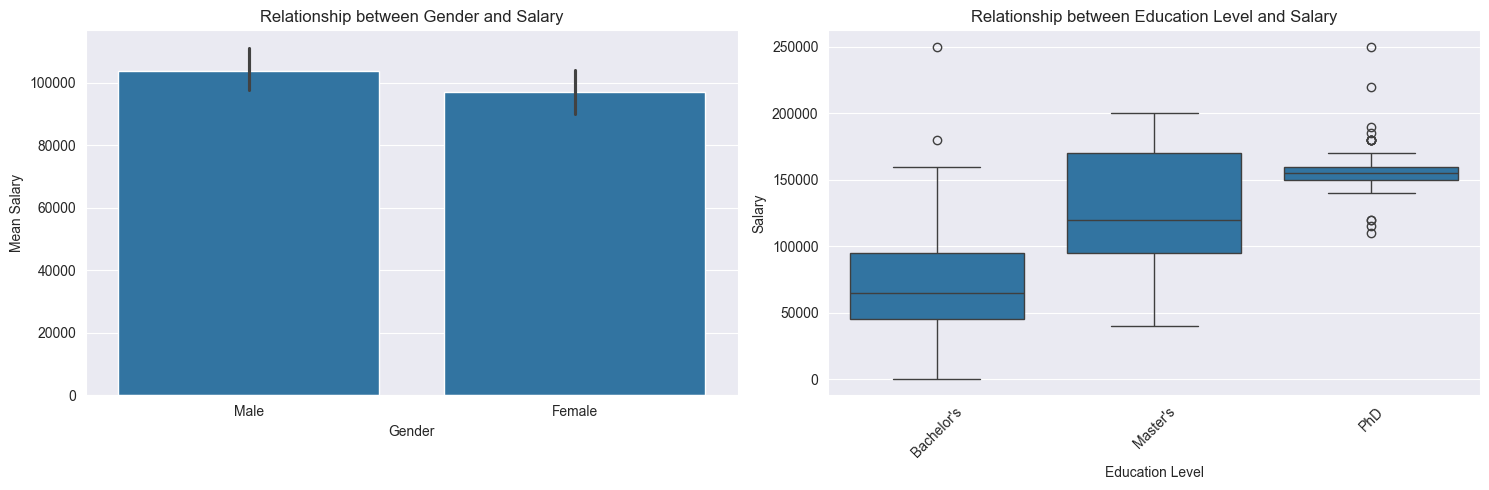

In [9]:
# Create a figure with two subplots
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Create a bar plot for the relationship between Gender and Salary in the first subplot
sns.barplot(x="Gender", y="Salary", data=df, ax=ax[0])
ax[0].set(
    title="Relationship between Gender and Salary",
    xlabel="Gender",
    ylabel="Mean Salary",
)

# Create a box plot for the relationship between Education Level and Salary in the second subplot
sns.boxplot(x="Education Level", y="Salary", data=df, ax=ax[1])
ax[1].set(
    title="Relationship between Education Level and Salary",
    xlabel="Education Level",
    ylabel="Salary",
)

# Rotate x-axis labels in the second subplot for better readability
ax[1].tick_params(axis="x", rotation=45)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

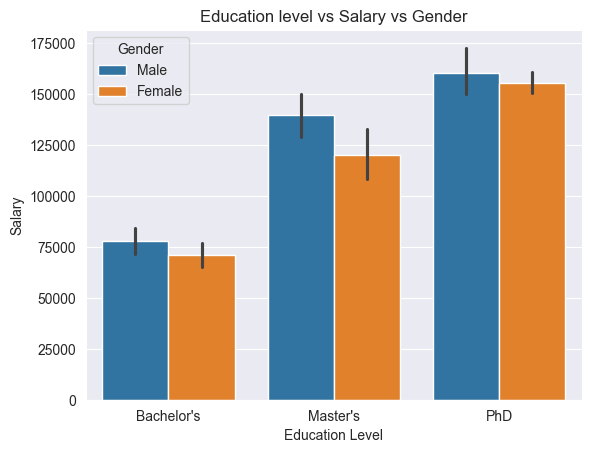

In [10]:
sns.barplot(x="Education Level", y="Salary", data=df, hue="Gender").set(
    title="Education level vs Salary vs Gender"
)
plt.show()

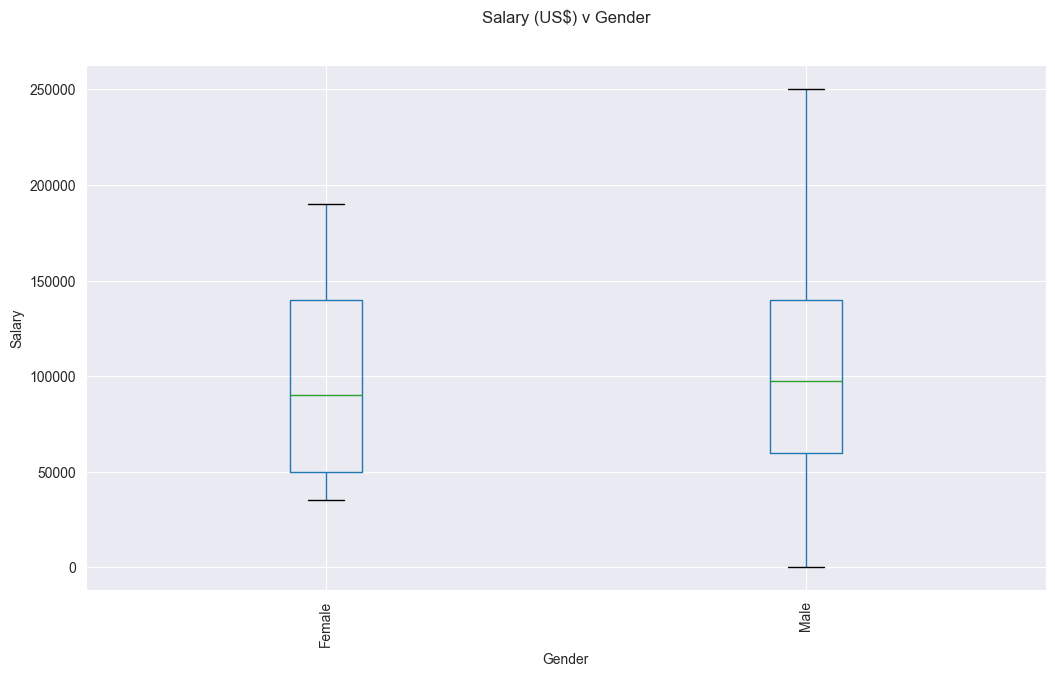

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(12, 7))
df.boxplot("Salary", "Gender", ax=ax)
plt.suptitle("Salary (US$) v Gender")
plt.title("")
plt.ylabel("Salary")
plt.xticks(rotation=90)
plt.show()

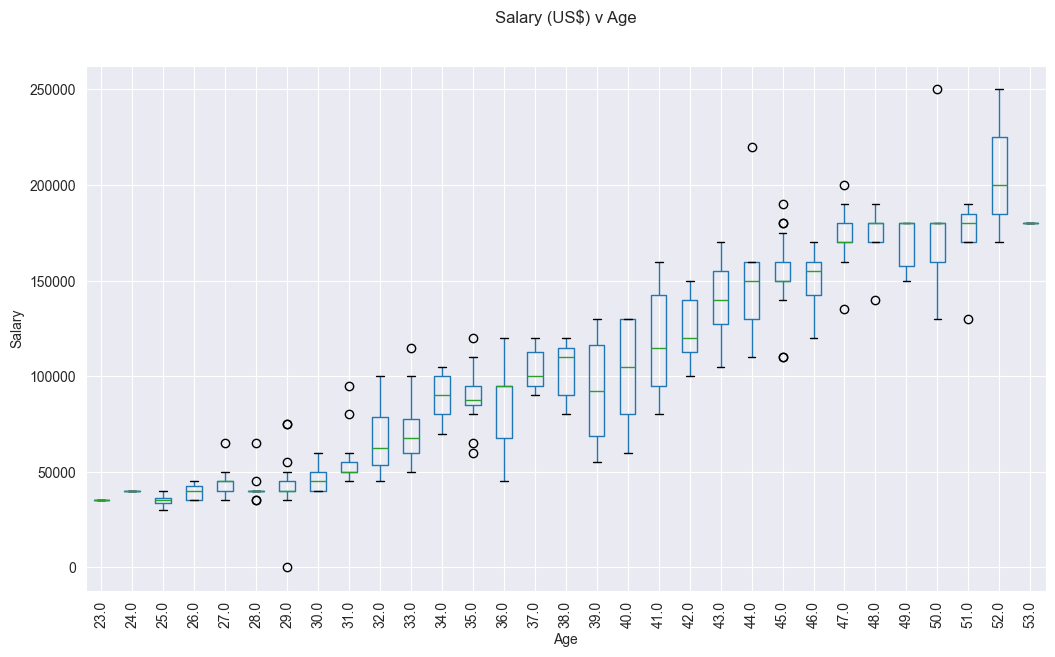

In [12]:


fig, ax = plt.subplots(1,1, figsize=(12, 7))
df.boxplot('Salary', 'Age', ax=ax)
plt.suptitle('Salary (US$) v Age')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()



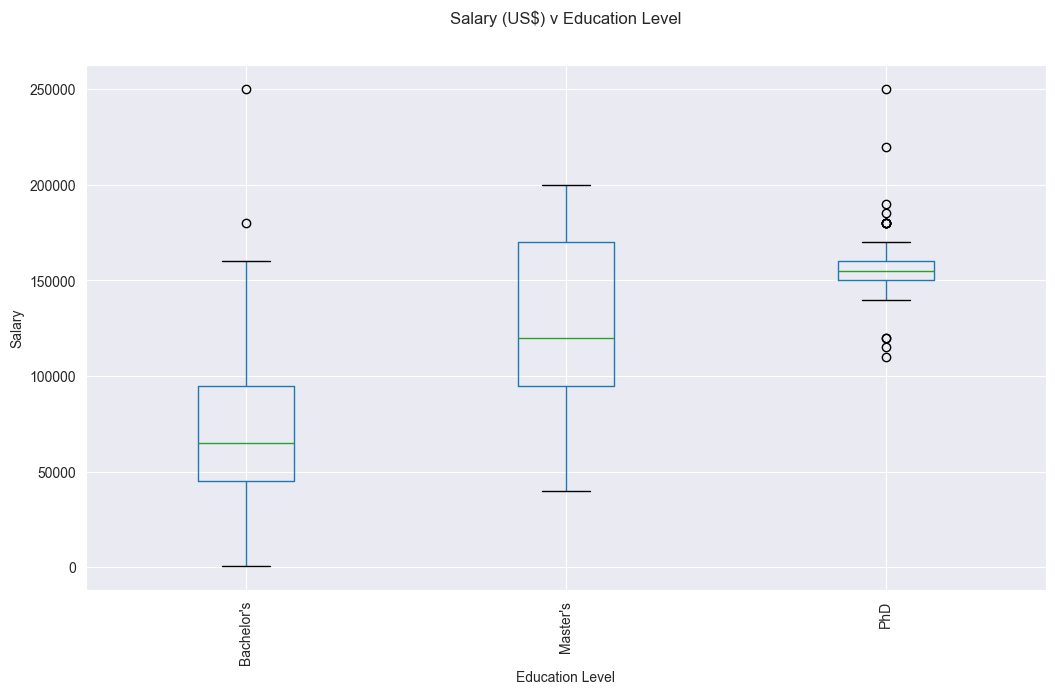

In [14]:
fig, ax = plt.subplots(1,1, figsize=(12, 7))
df.boxplot('Salary', 'Education Level', ax=ax)
plt.suptitle('Salary (US$) v Education Level')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

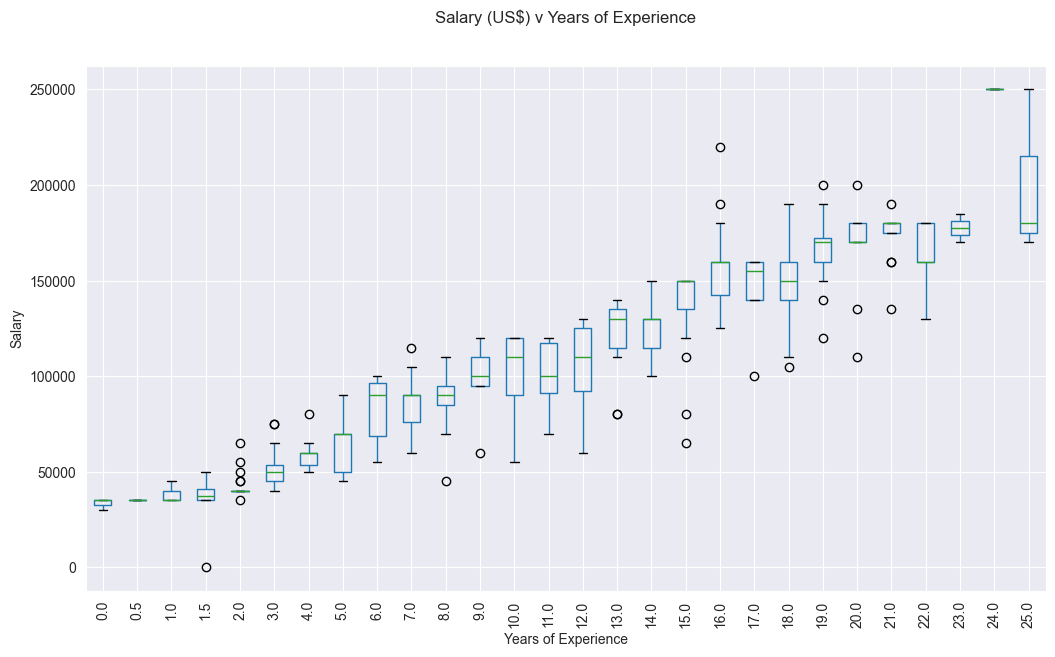

In [15]:
fig, ax = plt.subplots(1,1, figsize=(12, 7))
df.boxplot('Salary', 'Years of Experience', ax=ax)
plt.suptitle('Salary (US$) v Years of Experience')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

# quantile

In [16]:
# detecting the outliers in salary column using IQR method
Q1 = df.Salary.quantile(0.25) # First Quartile
Q3 = df.Salary.quantile(0.75) # Third Quartile

# Caltulation Interquartile
IQR = Q3-Q1

# Deetecting outliers lying 1.5x of IQR above and below Q1 and Q3 resp
lower = Q1-1.5*IQR
upper = Q3+1.5*IQR

In [17]:
df[df.Salary>upper]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary


In [18]:
df[df.Salary<lower]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary


# preparing for ml

In [19]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [20]:
# Mapping Education Level column
education_mapping = {"High School": 0, "Bachelor's": 1, "Master's": 2, "PhD": 3}
df['Education Level'] = df['Education Level'].map(education_mapping)

# Label encoding the categorical variable
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])


In [21]:
# Creating dummies for Job titles
dummies = pd.get_dummies(df['Job Title'],drop_first=True)
df = pd.concat([df,dummies],axis=1)

# Drop Job Title column
df.drop('Job Title',inplace=True,axis=1)
df.head()

,Age,Gender,Education Level,Years of Experience,Salary
0,32.0,1,1,5.0,90000.0
1,28.0,0,2,3.0,65000.0
2,45.0,1,3,15.0,150000.0
3,36.0,0,1,7.0,60000.0
4,52.0,1,2,20.0,200000.0


In [22]:
# Feature engineering: interaction between education and experience
df['Edu_Exp_Interaction'] = df['Education Level'] * df['Years of Experience']

In [23]:
# Scale numerical features
scaler = StandardScaler()
numeric_cols = ['Age', 'Years of Experience', 'Edu_Exp_Interaction']
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [24]:
# Apply log transformation to salary
df['Log_Salary'] = np.log(df['Salary'])

In [25]:
# Prepare features and target
X = df.drop(['Salary', 'Log_Salary'], axis=1)
y = df['Log_Salary']  # Using log-transformed salary

In [26]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

In [27]:
# Create a dictionary for defining models and tuning hyperparameters
model_params = {
    'Linear_Regression': {
        'model': LinearRegression(),
        'params': {}
    },
    'Decision_Tree': {
        'model': DecisionTreeRegressor(),
        'params': {
            'max_depth': [6, 10, 15],
            'min_samples_split': [5, 10]
        }
    },
    'Random_Forest': {
        'model': RandomForestRegressor(),
        'params': {
            'n_estimators': [50, 100],
            'max_depth': [10, 15, None],
            'min_samples_split': [2, 5]
        }
    }
}

In [28]:
# Hyperparameter tuning with grid search
results = []
for model_name, mp in model_params.items():
    print(f"Training {model_name}...")
    clf = GridSearchCV(
        mp['model'],
        mp['params'],
        cv=5,
        scoring='neg_mean_squared_error'
    )
    clf.fit(X_train, y_train)

    # Get the best model
    best_model = clf.best_estimator_

    # Make predictions on both train and test sets
    train_pred = best_model.predict(X_train)
    test_pred = best_model.predict(X_test)

    # Calculate metrics on log scale
    train_mse = mean_squared_error(y_train, train_pred)
    test_mse = mean_squared_error(y_test, test_pred)
    train_rmse = np.sqrt(train_mse)
    test_rmse = np.sqrt(test_mse)
    train_r2 = r2_score(y_train, train_pred)
    test_r2 = r2_score(y_test, test_pred)

    # Calculate metrics on original scale
    train_pred_orig = np.exp(train_pred)
    test_pred_orig = np.exp(test_pred)
    train_actual_orig = np.exp(y_train)
    test_actual_orig = np.exp(y_test)

    train_mse_orig = mean_squared_error(train_actual_orig, train_pred_orig)
    test_mse_orig = mean_squared_error(test_actual_orig, test_pred_orig)
    train_rmse_orig = np.sqrt(train_mse_orig)
    test_rmse_orig = np.sqrt(test_mse_orig)

    results.append({
        'Model': model_name,
        'Params': clf.best_params_,
        'Train_MSE_Log': train_mse,
        'Test_MSE_Log': test_mse,
        'Train_RMSE_Log': train_rmse,
        'Test_RMSE_Log': test_rmse,
        'Train_R2': train_r2,
        'Test_R2': test_r2,
        'Train_MSE_Original': train_mse_orig,
        'Test_MSE_Original': test_mse_orig,
        'Train_RMSE_Original': train_rmse_orig,
        'Test_RMSE_Original': test_rmse_orig
    })

# Create dataframe with results
results_df = pd.DataFrame(results)

Training Linear_Regression...
Training Decision_Tree...
Training Random_Forest...



Model Performance (Log Scale):
               Model  Train_MSE_Log  Test_MSE_Log  Train_RMSE_Log  \
0  Linear_Regression       0.113875      0.033032        0.337453   
1      Decision_Tree       0.076517      0.031831        0.276617   
2      Random_Forest       0.065801      0.024555        0.256517   

   Test_RMSE_Log  Train_R2   Test_R2  
0       0.181748  0.700833  0.866099  
1       0.178413  0.798978  0.870969  
2       0.156702  0.827130  0.900462  

Model Performance (Original Scale):
               Model  Train_MSE_Original  Test_MSE_Original  \
0  Linear_Regression        3.526023e+08       3.423726e+08   
1      Decision_Tree        1.111797e+08       3.919440e+08   
2      Random_Forest        1.000287e+08       3.185347e+08   

   Train_RMSE_Original  Test_RMSE_Original  
0         18777.706867        18503.312430  
1         10544.179411        19797.575086  
2         10001.432406        17847.539685  

Best model: Random_Forest with Test RMSE (log scale): 0.1567
Cor

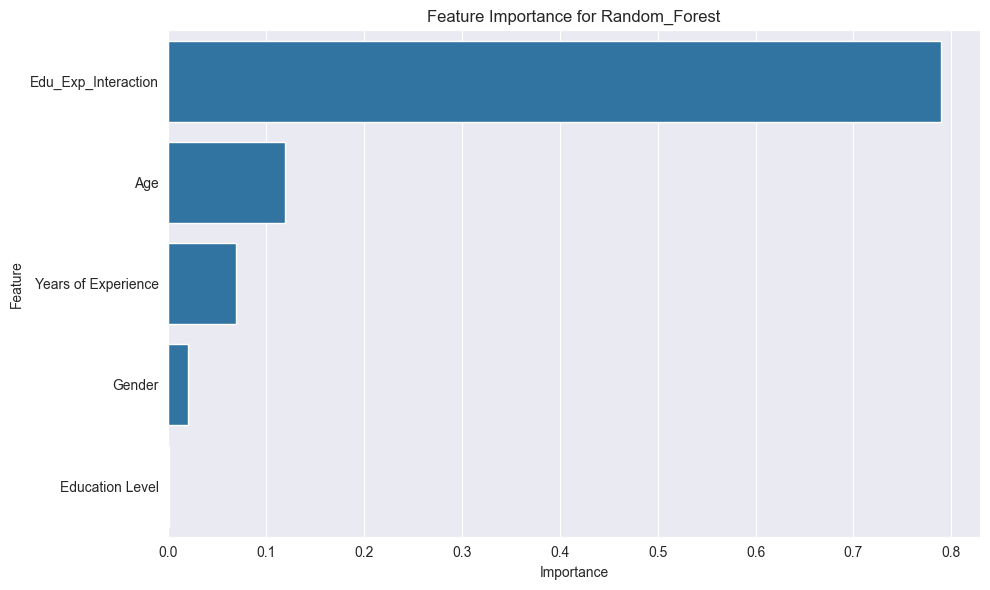

In [29]:
# Display results
print("\nModel Performance (Log Scale):")
print(results_df[['Model', 'Train_MSE_Log', 'Test_MSE_Log', 'Train_RMSE_Log', 'Test_RMSE_Log', 'Train_R2', 'Test_R2']])

print("\nModel Performance (Original Scale):")
print(results_df[['Model', 'Train_MSE_Original', 'Test_MSE_Original', 'Train_RMSE_Original', 'Test_RMSE_Original']])

# Find the best model based on test RMSE
best_model_index = results_df['Test_RMSE_Log'].idxmin()
best_model_name = results_df.loc[best_model_index, 'Model']
print(
    f"\nBest model: {best_model_name} with Test RMSE (log scale): {results_df.loc[best_model_index, 'Test_RMSE_Log']:.4f}")
print(f"Corresponding Test RMSE (original scale): ${results_df.loc[best_model_index, 'Test_RMSE_Original']:.2f}")

# Feature importance for the best model (if applicable)
if best_model_name != 'Linear_Regression':
    best_model = model_params[best_model_name]['model']
    best_params = results_df.loc[best_model_index, 'Params']

    # Set parameters and refit
    for param, value in best_params.items():
        setattr(best_model, param, value)

    best_model.fit(X_train, y_train)

    # Get feature importance
    if hasattr(best_model, 'feature_importances_'):
        importances = best_model.feature_importances_
        feature_names = X.columns

        # Create dataframe with feature importances
        feat_importances = pd.DataFrame({
            'Feature': feature_names,
            'Importance': importances
        }).sort_values('Importance', ascending=False)

        print("\nFeature Importance:")
        print(feat_importances)

        # Plot feature importance
        plt.figure(figsize=(10, 6))
        sns.barplot(x='Importance', y='Feature', data=feat_importances)
        plt.title(f'Feature Importance for {best_model_name}')
        plt.tight_layout()
        plt.show()
else:
    # For Linear Regression, show coefficients
    best_model = LinearRegression()
    best_model.fit(X_train, y_train)

    coef_df = pd.DataFrame({
        'Feature': X.columns,
        'Coefficient': best_model.coef_
    }).sort_values('Coefficient', ascending=False)

    print("\nLinear Regression Coefficients:")
    print(coef_df)

    # Plot coefficients
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Coefficient', y='Feature', data=coef_df)
    plt.title('Linear Regression Coefficients')
    plt.tight_layout()
    plt.show()

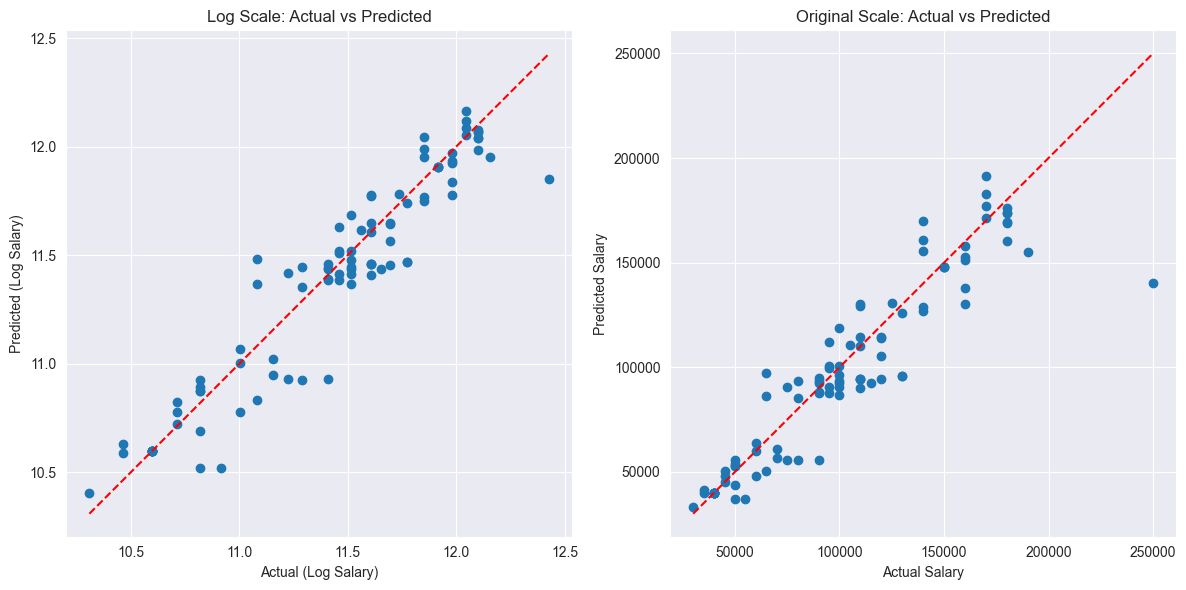

In [30]:
# Visualize actual vs predicted values for the best model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual (Log Salary)')
plt.ylabel('Predicted (Log Salary)')
plt.title('Log Scale: Actual vs Predicted')

plt.subplot(1, 2, 2)
y_test_orig = np.exp(y_test)
y_pred_orig = np.exp(y_pred)
plt.scatter(y_test_orig, y_pred_orig)
plt.plot([y_test_orig.min(), y_test_orig.max()], [y_test_orig.min(), y_test_orig.max()], 'r--')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Original Scale: Actual vs Predicted')

plt.tight_layout()
plt.show()